In [1]:
%matplotlib inline

In [2]:
#==============================================================================
# RUN THE MODEL AND PLOT
#==============================================================================
from pysb.simulator import ScipyOdeSimulator
import numpy as np
import matplotlib.pyplot as plt
#import kholodenko_basic as m
import kholodenko_m1 as m
import pandas as pd
import itertools
import math
import seaborn as sns

#define run time
tspan = np.linspace(0, 10, 1000)
#create solver
sim = ScipyOdeSimulator(m.model, tspan)

#==============================================================================
# SIMPLE SIMULATION WITH 4 SETUP FOR F AND G
#==============================================================================
#==============================================================================
# 
# #define f,g paramter set to simulate
# ff=[1.0, 0.01, 1.0, 0.01]
# gg=[1.0, 1.0, 100, 100];
# 
# #define I inhibitor concentration dilution
# I_dil = np.logspace(-2, 4, 20)
# 
# #run simulations with different f,g paramters over an inihibitor I dilution to
# #generate steady state plots of B, BB, BI, BBI and IBBI concentrations
# for i in range(len(ff)):
#     #build steady state response vector
#     ss_v = np.empty((len(I_dil), len(kholodenko_m1.model.observables)))
#     for j in range(len(I_dil)):
#         res = sim.run(param_values={'conc_I_0':I_dil[j], 'f':ff[i], 'g':gg[i]})
#         #res.dataframe.loc[:, 'B_obs':'IBBI_obs'].plot()
#         #plt.show()
#         ss_v[j] = list(res.observables[-1])
#         ss_v
#     plt.figure()    
#     plt.plot(I_dil, ss_v[:,2:8], marker='o')
#     plt.xscale('log')
#     str_leg=[d[0] for d in res.observables.dtype.descr]
#     plt.legend(str_leg[2:8])
#==============================================================================

#==============================================================================
# COMPLEX SIMULATION WITH SCAN FOR F AND G OVER MULTIPLE VALUES
#==============================================================================

#set param scan
ff=np.logspace(-3, 3, 7, base=10.0)
gg=np.logspace(-3, 3, 7, base=10.0)

#define I inhibitor concentration dilution
I_dil = np.logspace(-2, 4, 20)

#perform simulations
condition_x = 'f'
condition_y = 'g'
condition_z = 'conc_I_0'

values_x = ff
values_y = gg
values_z = I_dil

outfile = 'kholodenko_basic_output.png'

In [3]:
### TRY NOT TO MODIFY CODE BELOW. LATTICE PLOT FOR X, Y, Z titrations with arbitrary number of species. 
### Steady state values 
columns = [condition_x, condition_y, 'species', condition_z, 'n_species']
df = pd.DataFrame(dict([(x, []) for x in columns]))
obs = m.model.observables.keys()

In [4]:
for i, j in itertools.product(range(len(values_x)), range(len(values_y))):

    for z in range(len(values_z)):
        res = sim.run(param_values={condition_z: values_z[z], condition_x: values_x[i], condition_y: values_y[j]})
        ss_df = pd.DataFrame({condition_x: np.tile(values_x[i], len(obs)), 
                              condition_y: np.tile(values_y[j], len(obs)), 
                              'species': obs,
                              condition_z: np.tile(values_z[z], len(obs)), 
                              'n_species': list(res.observables[-1])})
        df = pd.concat([df, ss_df])

In [5]:
df[condition_x] = pd.to_numeric(df[condition_x])
df[condition_y] = pd.to_numeric(df[condition_y])
df['n_species'] = map(lambda x: math.log10(x+1), pd.to_numeric(df['n_species'])) # pseudo count +1 to prevent -inf
df[condition_z] = pd.to_numeric(df[condition_z])

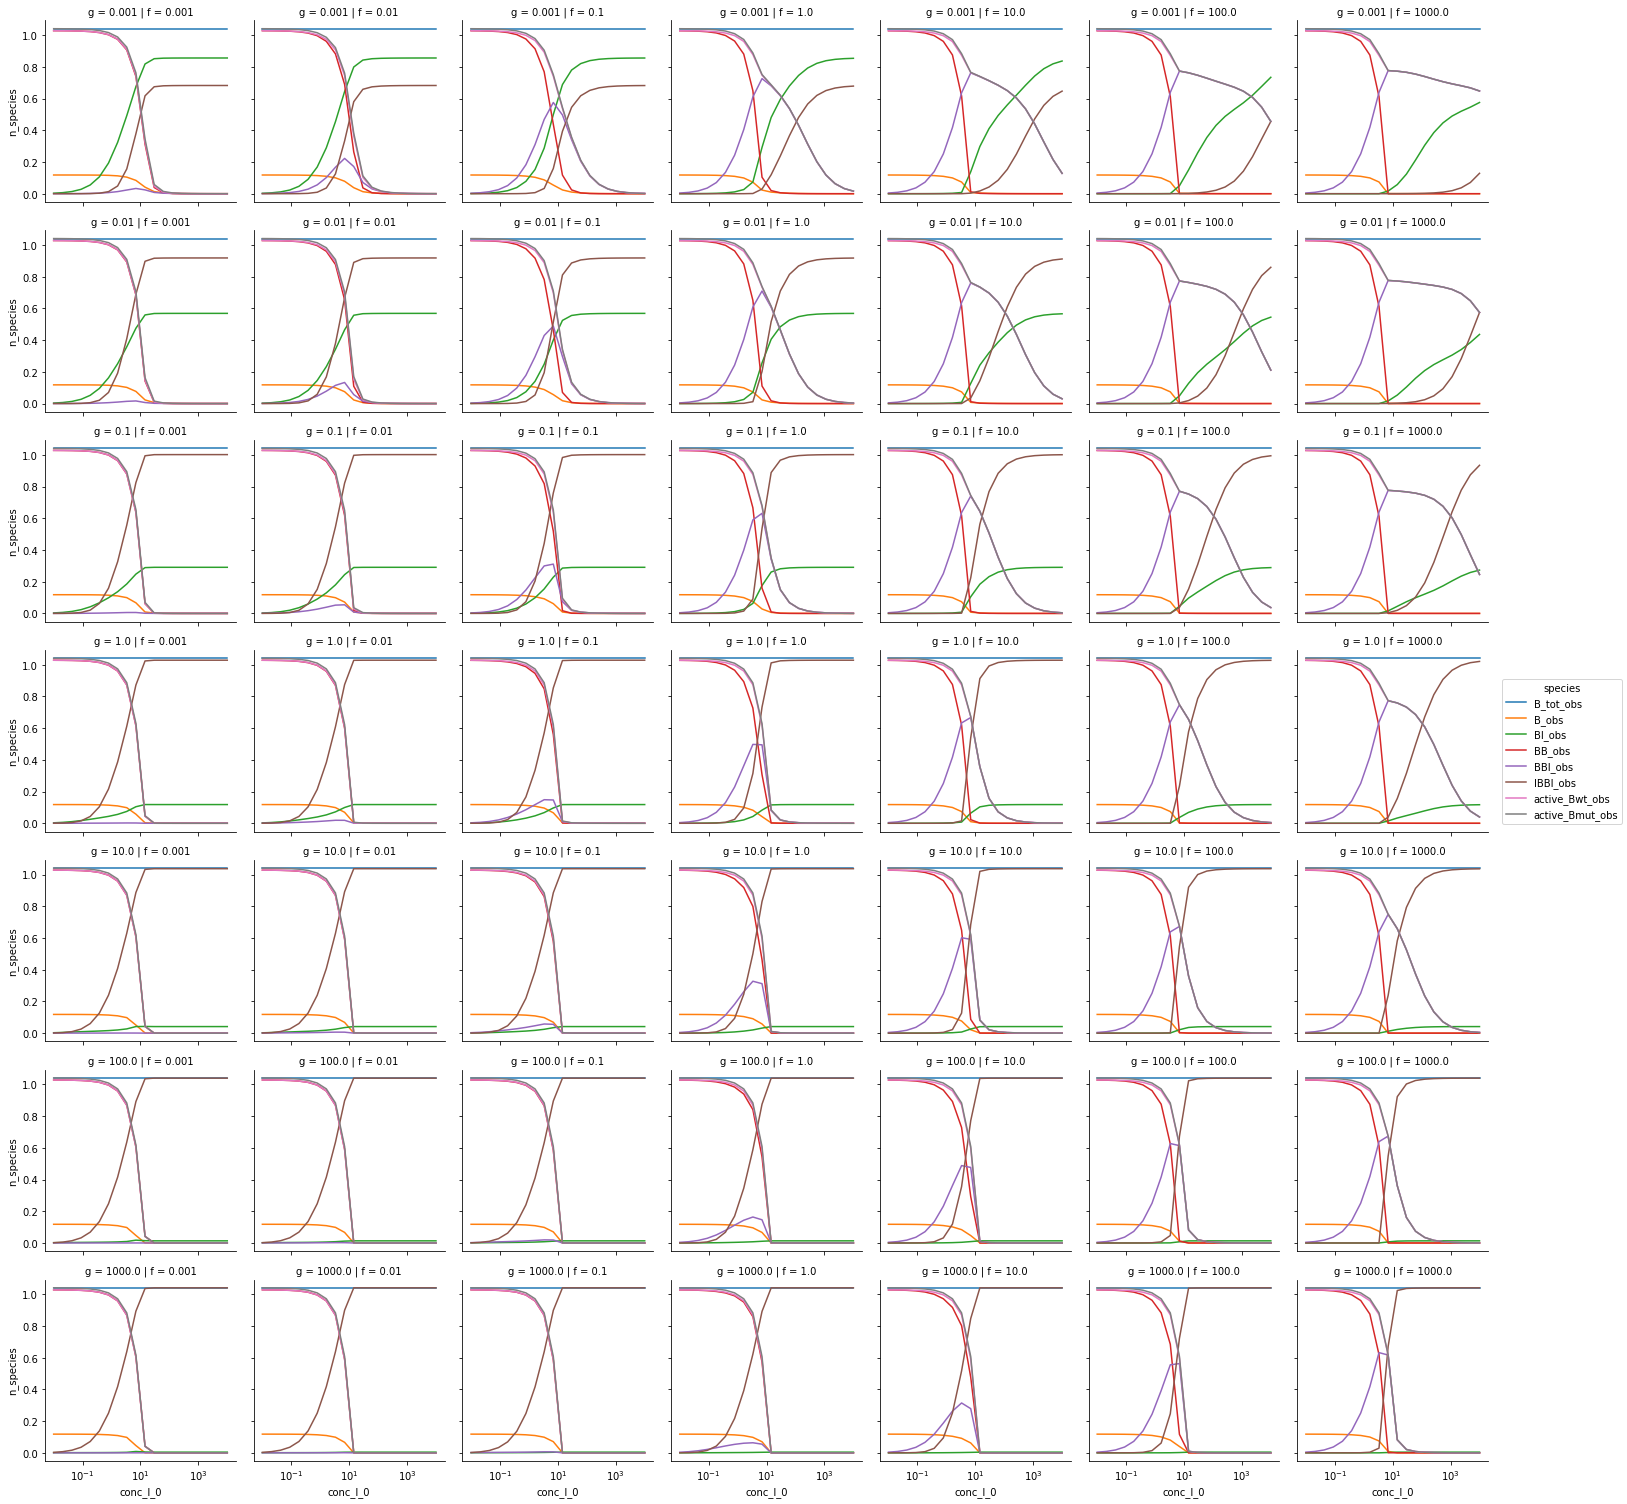

In [6]:
g = sns.FacetGrid(df, col=condition_x, row=condition_y, hue='species')
g = (g.map(plt.semilogx, condition_z, 'n_species').add_legend())
#plt.savefig(outfile)
plt.show()
#plt.close()

In [7]:
## NCA Polymerization
